In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import cmasher as cmr

# First Load in all the F360M Data

In [2]:
# Directory containing the contrast files
directory_f360m = '/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/calcon/'
rawcon_dir_f360m = ""

In [3]:
best_dict_f360m = {
#     "ADI":{"ann_sub":(20,6),
#                     "seps_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
#                     "cons_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
#                     "linestyle":'-'},
             "RDI": {"ann_sub":(20,6),
                     "seps_filename":"RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                     "cons_filename":"RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                     "linestyle":'-'},
             "ADI+RDI": {"ann_sub":(20,6),
                        "seps_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                        "cons_filename":"ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                        "linestyle":'--'},
             }


In [4]:
#Klip datadir: 
klip_dir_f360m = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/"
klip_filename_f360m = "ADI+RDI_NANNU20_NSUBS6_JWST_NIRCAM_NRCALONG_F360M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits"
kl_index_f360m = 3 #This should be 10 KL modes
klip_image_f360m = fits.open(os.path.join(klip_dir_f360m,klip_filename_f360m))[0].data[kl_index_f360m]
klip_header_f360m = fits.open(os.path.join(klip_dir_f360m,klip_filename_f360m))[0].header

In [5]:
#Pyklip doesn't have all the header info, so let's grab one: 
f360m_roll1_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/jw01386117001_03107_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"
f360m_roll1_header0 = fits.open(f360m_roll1_filename)[0].header
f360m_roll1_header1 = fits.open(f360m_roll1_filename)[1].header


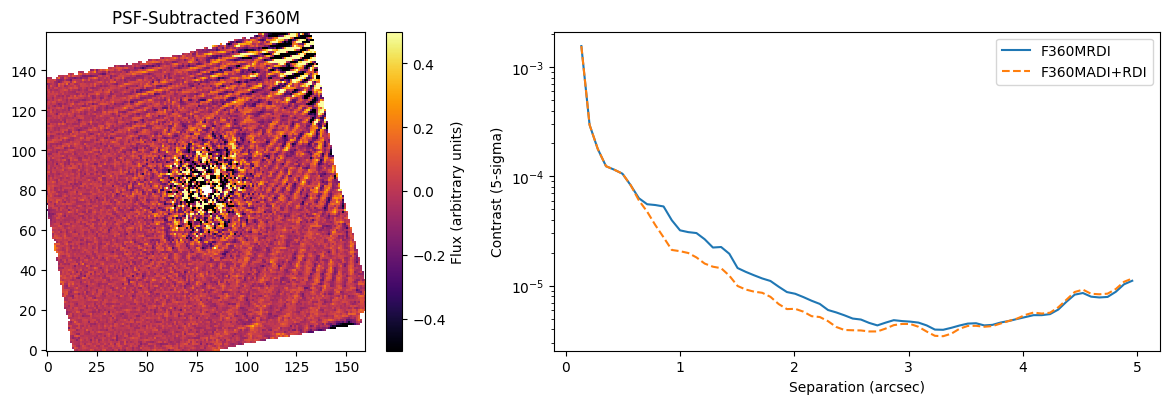

In [6]:
# Create a figure and two subplots with the desired widths
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1.4, 2]})

#Coronagraphic center: 
coron_center = [173.4-80,149.1-80]

### KLIP Data 
# cmap = plt.get_cmap('cmr.guppy')   # MPL
# cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.wildfire')   # MPL
cmap = "inferno"
im0 = axes[0].imshow(klip_image_f360m, origin="lower",vmin=-0.5,vmax=0.5,cmap=cmap)
plt.colorbar(im0, ax=axes[0], label="Flux (arbitrary units)")

axes[0].set_title("PSF-Subtracted F360M")

for key in best_dict_f360m.keys():
    seps = np.load(directory_f360m+best_dict_f360m[key]["seps_filename"])
    cons = np.load(directory_f360m+best_dict_f360m[key]["cons_filename"])
    axes[1].semilogy(seps[kl_index_f360m], cons[kl_index_f360m], label="F360M"+key,linestyle=best_dict_f360m[key]["linestyle"])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("Contrast (5-sigma)")

plt.tight_layout()


# Now load in the F300M Data

In [7]:
# Directory containing the contrast files
directory_f300m = '/home/maxmb/Library/jwst_hd141569a_lib/data/F300M/jk/231108/for_planet_sensitivity/spaceklip/calcon/'
rawcon_dir_f300m = ""

In [8]:
# A dictionary showing where to find the contrasts for each reduction mode: 
best_dict_f300m = {
#     "ADI":{"ann_sub":(20,6),
#                     "seps_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
#                     "cons_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
#                     "linestyle":'-'},
             "RDI": {"ann_sub":(20,6),
                     "seps_filename":"RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                     "cons_filename":"RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                     "linestyle":'-'},
             "ADI+RDI": {"ann_sub":(20,6),
                        "seps_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy",
                        "cons_filename":"ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_cons.npy",
                        "linestyle":'--'},
             }


In [9]:
#Klip datadir: 
klip_dir_f300m = "/home/maxmb/Library/jwst_hd141569a_lib/data/F300M/jk/231108/for_planet_sensitivity/spaceklip/klipsub_final_240221/"
klip_filename_f300m = "ADI+RDI_NANNU20_NSUBS4_JWST_NIRCAM_NRCALONG_F300M_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits"
kl_index_f300m = 3 #This should be 10 KL modes
klip_image_f300m = fits.open(os.path.join(klip_dir_f300m,klip_filename_f300m))[0].data[kl_index_f300m]
klip_header_f300m = fits.open(os.path.join(klip_dir_f300m,klip_filename_f300m))[0].header

In [10]:
#Pyklip doesn't have all the header info, so let's grab one: 
f300m_roll1_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F300M/jk/231108/jw01386117001_03106_00001_nrcalong_calints_mstar_subtracted_disk_subtracted.fits"
f300m_roll1_header0 = fits.open(f300m_roll1_filename)[0].header
f300m_roll1_header1 = fits.open(f300m_roll1_filename)[1].header


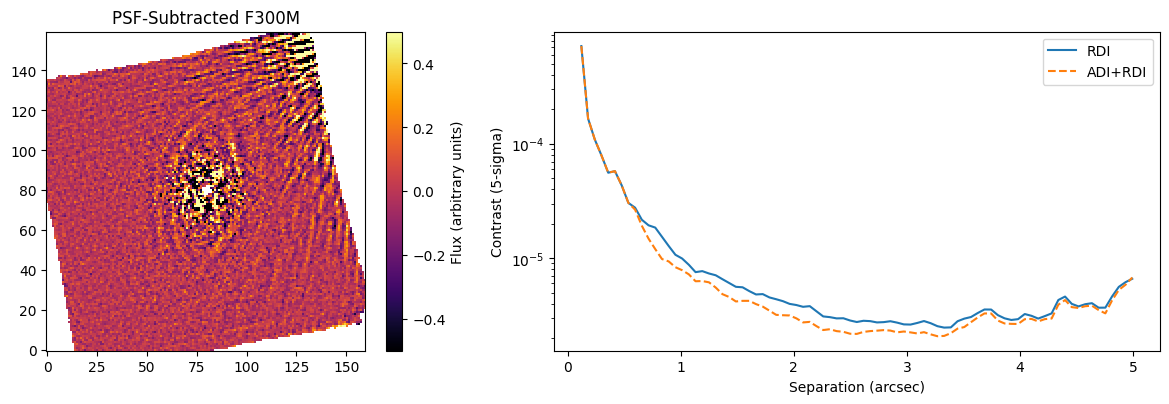

In [11]:
# Create a figure and two subplots with the desired widths
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1.4, 2]})

#Coronagraphic center: 
coron_center = [173.4-80,149.1-80]

### KLIP Data 
cmap = plt.get_cmap('cmr.guppy')   # MPL
# cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.wildfire')   # MPL
cmap = "inferno"
im0 = axes[0].imshow(klip_image_f300m, origin="lower",vmin=-0.5,vmax=0.5,cmap=cmap)
plt.colorbar(im0, ax=axes[0], label="Flux (arbitrary units)")

axes[0].set_title("PSF-Subtracted F300M")

for key in best_dict_f300m.keys():
    seps = np.load(directory_f300m+best_dict_f300m[key]["seps_filename"])
    cons = np.load(directory_f300m+best_dict_f300m[key]["cons_filename"])
    axes[1].semilogy(seps[kl_index_f300m], cons[kl_index_f300m], label=key,linestyle=best_dict_f300m[key]["linestyle"])

axes[1].legend()
axes[1].set_xlabel("Separation (arcsec)")
axes[1].set_ylabel("Contrast (5-sigma)")

plt.tight_layout()


# Read in atmospheric models from species

In [12]:
from species import SpeciesInit
from species.data.database import Database
from species.read.read_isochrone import ReadIsochrone

SpeciesInit()
database = Database()
database.add_isochrones(model='atmo')
read_iso = ReadIsochrone(tag='atmo-ceq')

print(read_iso.get_filters())

/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/fit_evolution.py:18: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(
/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/fit_model.py:27: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(
/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/species/analysis/retrieval.py:24: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


species v0.7.4
Working folder: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity
 -> A new version (0.9.0) is available!
 -> It is recommended to update to the latest version
 -> See https://github.com/tomasstolker/species for details
Configuration settings:
   - Database: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity/species_database.hdf5
   - Data folder: /home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Planet_Sensitivity/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
['MKO_Y', 'MKO_J', 'MKO_H', 'MKO_K', 'MKO_Lp', 'MKO_Mp', 'W1', 'W2', 'W3', 'W4', 'IRAC_CH1', 'IRAC_CH2']


# Centering and pixel scale and flux unit conversion

In [13]:
conversion_factor_f360m = f360m_roll1_header1["PHOTUJA2"]/f360m_roll1_header1["PHOTMJSR"]
conversion_factor_f300m = f300m_roll1_header1["PHOTUJA2"]/f300m_roll1_header1["PHOTMJSR"]
klip_image_f300m *= conversion_factor_f300m
klip_image_f360m *= conversion_factor_f360m

data_shape = klip_image_f360m.shape
pixel_scale_f360m = np.sqrt(f360m_roll1_header1['PIXAR_A2'])

#Coronagraphic center: 
coron_center = [80,80] #See the KLIP Header

#F300M/F360M - pixel sizes and plotting range - These are the same for the two filters
x_size_f300m = klip_image_f360m.shape[1]
y_size_f300m = klip_image_f360m.shape[0]
x_f300m = np.arange(x_size_f300m)
y_f300m = np.arange(y_size_f300m)
x_f300m = (x_f300m-coron_center[1])*pixel_scale_f360m
y_f300m = (y_f300m-coron_center[0])*pixel_scale_f360m
xx_f300m,yy_f300m = np.meshgrid(x_f300m,y_f300m)

In [14]:
from spaceKLIP.starphot import get_stellar_magnitudes
rawcon_dir = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/for_planet_sensitivity/spaceklip/rawcon/"
ccinfo = os.path.join(rawcon_dir, 'contrast_curve_info.txt')
with open(ccinfo) as cci:
    starfile, spectral_type = cci.readline().strip('\n').split(' /// ')
    starfile = os.path.join(rawcon_dir, starfile.replace('#',''))
mstar, fzero = get_stellar_magnitudes(starfile,
                                        'A0V',
                                        'NIRCAM',
                                        )
mstar_f300m = mstar['F300M'] #The magnitude of the star in the F300M filter
mstar_f360m = mstar['F360M'] #The magnitude of the star in the F360M filter

/home/maxmb/anaconda3/envs/spaceklip/lib/python3.11/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


# Calculate mass_curves

The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated 

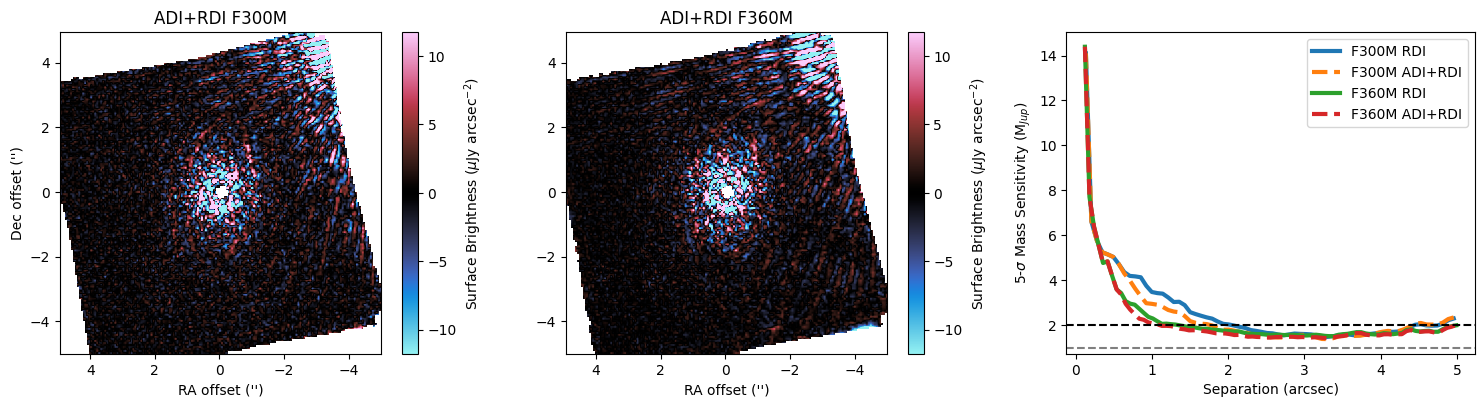

In [15]:

# fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.4, 2]})
fig, axes = plt.subplots(1, 3, figsize=(15,4))


# Load the style sheet
style = plt.style.library['seaborn-v0_8-colorblind']  # Change to the desired style sheet name
# Get the color cycler from the style sheet
color_cycler = style['axes.prop_cycle']
axes[0].set_prop_cycle(color_cycler)
axes[1].set_prop_cycle(color_cycler)

### Pick the Colormap
cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # Don't love
# cmap = plt.get_cmap('cmr.wildfire')   # Nope this one has weird neon green
# cmap='inferno'

### Plot the F300M Data
im0 = axes[0].imshow(klip_image_f300m, origin="lower",vmin=-0.5*conversion_factor_f300m,vmax=0.5*conversion_factor_f300m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im0, ax=axes[0], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[0].set_title("ADI+RDI F300M")
axes[0].set_xlabel("RA offset ('')")
axes[0].set_ylabel("Dec offset ('')")


### Plot the F360M Data
im1 = axes[1].imshow(klip_image_f360m, origin="lower",vmin=-0.5*conversion_factor_f360m,vmax=0.5*conversion_factor_f360m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im1, ax=axes[1], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[1].set_title("ADI+RDI F360M")
axes[1].set_xlabel("RA offset ('')")
# axes[1].set_ylabel("Dec offset ('')")

### Contrast Curve F360M
for key in best_dict_f360m.keys():
    seps = np.load(directory_f360m+best_dict_f360m[key]["seps_filename"])
    cons = np.load(directory_f360m+best_dict_f360m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F360M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f360m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f360m], masses, label="F300M "+key,linestyle=best_dict_f360m[key]["linestyle"],linewidth=3)

### Contrast Curve F300M
for key in best_dict_f300m.keys():
    seps = np.load(directory_f300m+best_dict_f300m[key]["seps_filename"])
    cons = np.load(directory_f300m+best_dict_f300m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F300M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f300m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f300m], masses, label="F360M "+key,linestyle=best_dict_f300m[key]["linestyle"],linewidth=3)


axes[2].legend()
axes[2].set_xlabel("Separation (arcsec)")
axes[2].set_ylabel("5-$\sigma$ Mass Sensitivity (M$_{Jup}$)")
axes[2].axhline(2, color='k', linestyle='--', label='2 M$_{Jup}$')
axes[2].axhline(1, color='k', linestyle='--', label='1 M$_{Jup}$',alpha=0.5)

plt.tight_layout()

plt.savefig("klip_contrast_curve.png",dpi=300)
plt.show()



# Load in pynrc contrast curve

In [16]:
pynrc_contrast_f300m = np.load("contrast_curve_f300m.npy")
pynrc_contrast_f360m = np.load("contrast_curve_f360m.npy")

In [17]:
pynrc_contrast_f300m.shape

(3, 3, 173)

The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated 

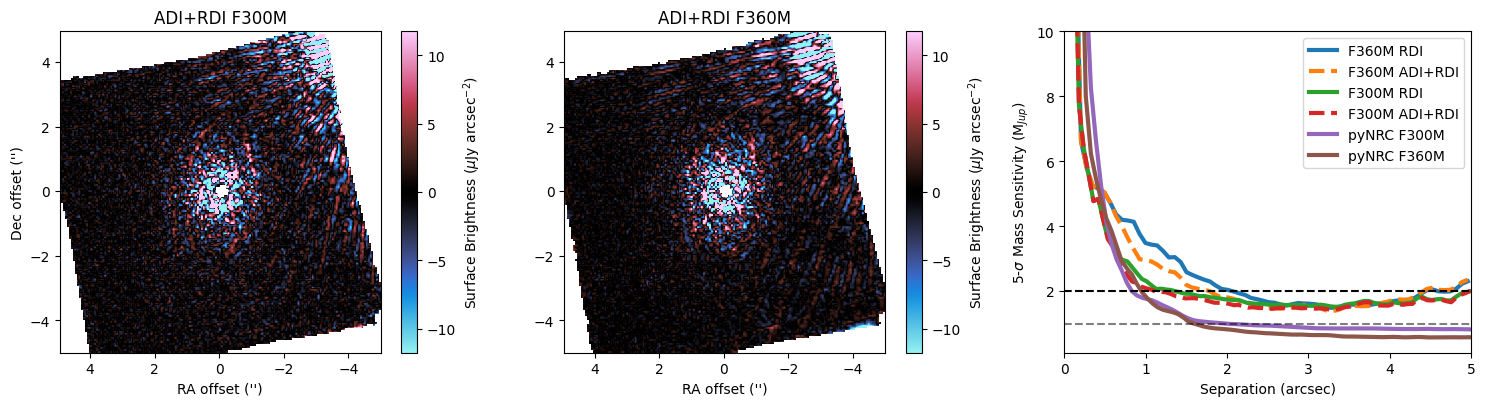

In [18]:

# fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.4, 2]})
fig, axes = plt.subplots(1, 3, figsize=(15,4))


# Load the style sheet
style = plt.style.library['seaborn-v0_8-colorblind']  # Change to the desired style sheet name
# Get the color cycler from the style sheet
color_cycler = style['axes.prop_cycle']
axes[0].set_prop_cycle(color_cycler)
axes[1].set_prop_cycle(color_cycler)

### Pick the Colormap
cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # Don't love
# cmap = plt.get_cmap('cmr.wildfire')   # Nope this one has weird neon green
# cmap='inferno'

### Plot the F300M Data
im0 = axes[0].imshow(klip_image_f300m, origin="lower",vmin=-0.5*conversion_factor_f300m,vmax=0.5*conversion_factor_f300m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im0, ax=axes[0], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[0].set_title("ADI+RDI F300M")
axes[0].set_xlabel("RA offset ('')")
axes[0].set_ylabel("Dec offset ('')")


### Plot the F360M Data
im1 = axes[1].imshow(klip_image_f360m, origin="lower",vmin=-0.5*conversion_factor_f360m,vmax=0.5*conversion_factor_f360m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im1, ax=axes[1], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[1].set_title("ADI+RDI F360M")
axes[1].set_xlabel("RA offset ('')")
# axes[1].set_ylabel("Dec offset ('')")

### Contrast Curve F360M
for key in best_dict_f360m.keys():
    seps = np.load(directory_f360m+best_dict_f360m[key]["seps_filename"])
    cons = np.load(directory_f360m+best_dict_f360m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F360M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f360m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f360m], masses, label="F360M "+key,linestyle=best_dict_f360m[key]["linestyle"],linewidth=3)



### Contrast Curve F300M
for key in best_dict_f300m.keys():
    seps = np.load(directory_f300m+best_dict_f300m[key]["seps_filename"])
    cons = np.load(directory_f300m+best_dict_f300m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F300M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f300m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f300m], masses, label="F300M "+key,linestyle=best_dict_f300m[key]["linestyle"],linewidth=3)

# PyNRM Limits now
pynrc_masses_f300m = read_iso.contrast_to_mass(age=5.,
                            distance=111.,
                            filter_name='JWST/NIRCam.F300M',
                            star_mag=mstar_f360m,
                            contrast=pynrc_contrast_f300m[1][1],
                            use_mag=False)
axes[2].plot(pynrc_contrast_f300m[1][0], pynrc_masses_f300m, label="pyNRC F300M",linewidth=3)
#Same thing but for f360m
pynrc_masses_f360m = read_iso.contrast_to_mass(age=5.,
                            distance=111.,
                            filter_name='JWST/NIRCam.F360M',
                            star_mag=mstar_f360m,
                            contrast=pynrc_contrast_f360m[1][1],
                            use_mag=False)
axes[2].plot(pynrc_contrast_f360m[1][0], pynrc_masses_f360m, label="pyNRC F360M",linewidth=3)

axes[2].legend()
axes[2].set_xlabel("Separation (arcsec)")
axes[2].set_ylabel("5-$\sigma$ Mass Sensitivity (M$_{Jup}$)")
axes[2].axhline(2, color='k', linestyle='--', label='2 M$_{Jup}$')
axes[2].axhline(1, color='k', linestyle='--', label='1 M$_{Jup}$',alpha=0.5)
axes[2].set_ylim(0.1,10)
axes[2].set_xlim(0.,5)
plt.tight_layout()

plt.savefig("klip_contrast_curve.png",dpi=300)
plt.show()



The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F360M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated atmospheric model spectra for calculating synthetic photometry.
The 'JWST/NIRCam.F300M' filter is not found in the list of available filters from the isochrone data of 'atmo-ceq'.
It will be tried to download the filter profile (if needed) and to use the associated 

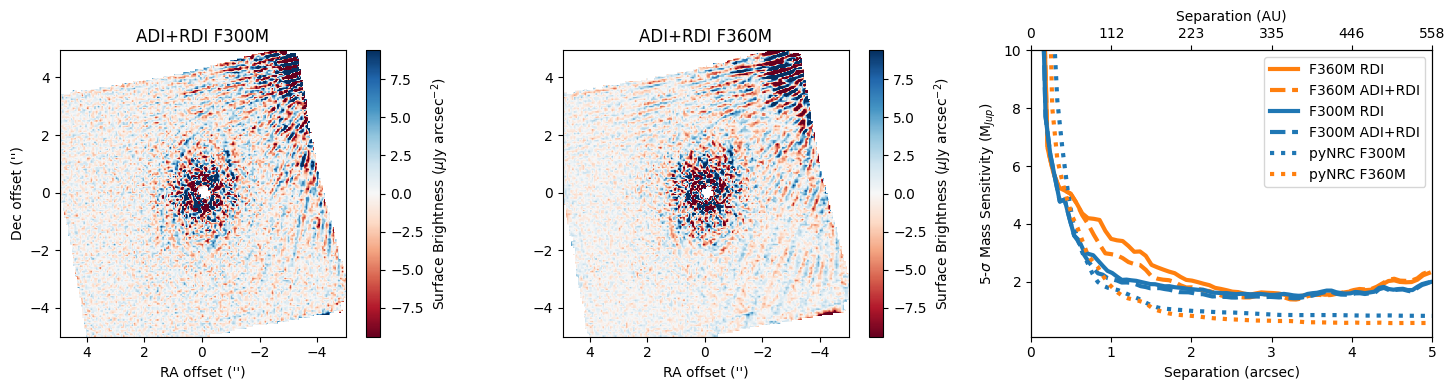

In [26]:

# fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.4, 2]})
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# fig, axes = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'width_ratios': [1., 1.3,1.]})


# Load the style sheet
style = plt.style.library['seaborn-v0_8-colorblind']  # Change to the desired style sheet name
# Get the color cycler from the style sheet
color_cycler = style['axes.prop_cycle']
axes[0].set_prop_cycle(color_cycler)
axes[1].set_prop_cycle(color_cycler)

### Pick the Colormap
cmap = plt.get_cmap('cmr.redshift')   # MPL
# cmap = plt.get_cmap('cmr.viola')   # Don't love
# cmap = plt.get_cmap('cmr.wildfire')   # Nope this one has weird neon green
# cmap='inferno'
cmap = 'RdBu'

### Plot the F300M Data
im0 = axes[0].imshow(klip_image_f300m, origin="lower",vmin=-0.4*conversion_factor_f300m,vmax=0.4*conversion_factor_f300m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im0, ax=axes[0], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[0].set_title("ADI+RDI F300M")
axes[0].set_xlabel("RA offset ('')")
axes[0].set_ylabel("Dec offset ('')")


### Plot the F360M Data
im1 = axes[1].imshow(klip_image_f360m, origin="lower",vmin=-0.4*conversion_factor_f360m,vmax=0.4*conversion_factor_f360m,cmap=cmap,
                     extent=[x_f300m[-1],x_f300m[0],y_f300m[0],y_f300m[-1]])
plt.colorbar(im1, ax=axes[1], label="Surface Brightness ($\mu$Jy arcsec$^{-2}$)")

axes[1].set_title("ADI+RDI F360M")
axes[1].set_xlabel("RA offset ('')")
# axes[1].set_ylabel("Dec offset ('')")

### Contrast Curve F360M
for key in best_dict_f360m.keys():
    seps = np.load(directory_f360m+best_dict_f360m[key]["seps_filename"])
    cons = np.load(directory_f360m+best_dict_f360m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F360M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f360m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f360m], masses, label="F360M "+key,linestyle=best_dict_f360m[key]["linestyle"],linewidth=3, color='C1')



### Contrast Curve F300M
for key in best_dict_f300m.keys():
    seps = np.load(directory_f300m+best_dict_f300m[key]["seps_filename"])
    cons = np.load(directory_f300m+best_dict_f300m[key]["cons_filename"])
    masses = read_iso.contrast_to_mass(age=5.,
                                distance=111.,
                                filter_name='JWST/NIRCam.F300M',
                                star_mag=mstar_f360m,
                                contrast=cons[kl_index_f300m],
                                use_mag=False)
    axes[2].plot(seps[kl_index_f300m], masses, label="F300M "+key,linestyle=best_dict_f300m[key]["linestyle"],linewidth=3, color='C0')

# PyNRM Limits now
pynrc_masses_f300m = read_iso.contrast_to_mass(age=5.,
                            distance=111.,
                            filter_name='JWST/NIRCam.F300M',
                            star_mag=mstar_f360m,
                            contrast=pynrc_contrast_f300m[1][1],
                            use_mag=False)
axes[2].plot(pynrc_contrast_f300m[1][0], pynrc_masses_f300m,":",label="pyNRC F300M",linewidth=3, color='C0')
#Same thing but for f360m
pynrc_masses_f360m = read_iso.contrast_to_mass(age=5.,
                            distance=111.,
                            filter_name='JWST/NIRCam.F360M',
                            star_mag=mstar_f360m,
                            contrast=pynrc_contrast_f360m[1][1],
                            use_mag=False)
axes[2].plot(pynrc_contrast_f360m[1][0], pynrc_masses_f360m,":",label="pyNRC F360M",linewidth=3, color='C1')







axes[2].legend()
axes[2].set_xlabel("Separation (arcsec)")
axes[2].set_ylabel("5-$\sigma$ Mass Sensitivity (M$_{Jup}$)")
# axes[2].axhline(2, color='k', linestyle=':', label='2 M$_{Jup}$')
# axes[2].axhline(1, color='k', linestyle=':', label='1 M$_{Jup}$',alpha=0.5)
axes[2].set_ylim(0.1,10)
axes[2].set_xlim(0.,5)

## Add a twin x-axis on the top of the plot that shows AU, converting from the bottom axis of arcsec to AU give a distance of 111 pc
distance = 111 #parsecs
parallax = 8.9597 #mas
distance = 1/(parallax*1e-3)
axes2 = axes[2].twiny()
axes2.set_xlim(0.,5)
axes2.set_xlabel("Separation (AU)")
axes2.set_xticks([0,1,2,3,4,5])
axes2.set_xticklabels(np.round(np.array([0,1,2,3,4,5])*distance,0).astype(int))


plt.tight_layout()

plt.savefig("klip_contrast_curve.png",dpi=300)
plt.show()

